# THI THỬ NHẬP MÔN XỬ LÝ ẢNH SỐ

# Câu 1

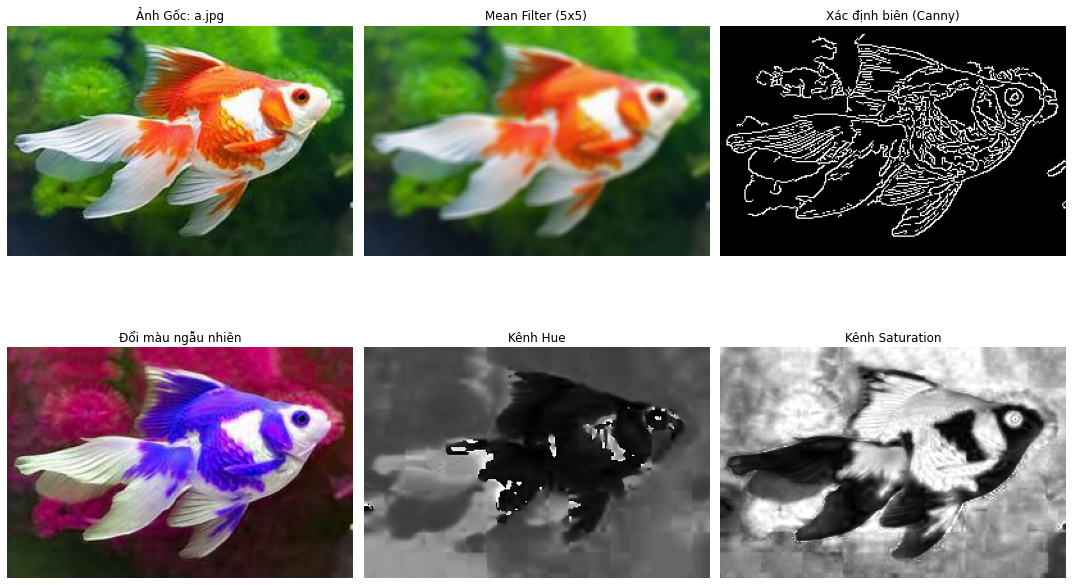

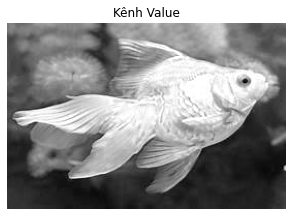

In [2]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# --- Câu 1 (2 Điểm): Cho ảnh có tên là a.jpg và thực hiện các yêu cầu: ---

try:
    img_a = cv2.imread('a.jpg')
    if img_a is None:
        raise FileNotFoundError("Không tìm thấy ảnh 'a.jpg'. Vui lòng kiểm tra lại đường dẫn hoặc tên file.")
except FileNotFoundError as e:
    print(e)
    exit()

plt.figure(figsize=(15, 10))

# 1. Hiển thị ảnh gốc
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(img_a, cv2.COLOR_BGR2RGB))
plt.title('Ảnh Gốc: a.jpg')
plt.axis('off')

# --- sử dụng mean filter cho ảnh ---
mean_filtered_img = cv2.blur(img_a, (5, 5))
plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(mean_filtered_img, cv2.COLOR_BGR2RGB))
plt.title('Mean Filter (5x5)')
plt.axis('off')

# --- sử dụng filter xác định biên của hình ảnh trên ---
gray_img_a = cv2.cvtColor(img_a, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray_img_a, 50, 150)
plt.subplot(2, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title('Xác định biên (Canny)')
plt.axis('off')

# --- đổi màu ảnh từ không gian màu BGR sang một màu ngẫu nhiên (RGB) ---
b, g, r = cv2.split(img_a)
channels = [b, g, r]
random.shuffle(channels)
random_color_img = cv2.merge(channels)
cv2.imwrite('a_random_color.jpg', random_color_img)
plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(random_color_img, cv2.COLOR_BGR2RGB))
plt.title('Đổi màu ngẫu nhiên')
plt.axis('off')

# --- Chuyển ảnh sang không gian màu HSV và tách riêng kênh Hue, Saturation, Value ---
hsv_img = cv2.cvtColor(img_a, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv_img)

cv2.imwrite('a_hue.jpg', h)
cv2.imwrite('a_saturation.jpg', s)
cv2.imwrite('a_value.jpg', v)

plt.subplot(2, 3, 5)
plt.imshow(h, cmap='gray')
plt.title('Kênh Hue')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(s, cmap='gray')
plt.title('Kênh Saturation')
plt.axis('off')

plt.tight_layout()
plt.show()

# Hiển thị riêng kênh Value nếu muốn
plt.figure(figsize=(5, 5))
plt.imshow(v, cmap='gray')
plt.title('Kênh Value')
plt.axis('off')
plt.show()

# CÂU 2

Đã đọc thành công 3 ảnh đầu vào.


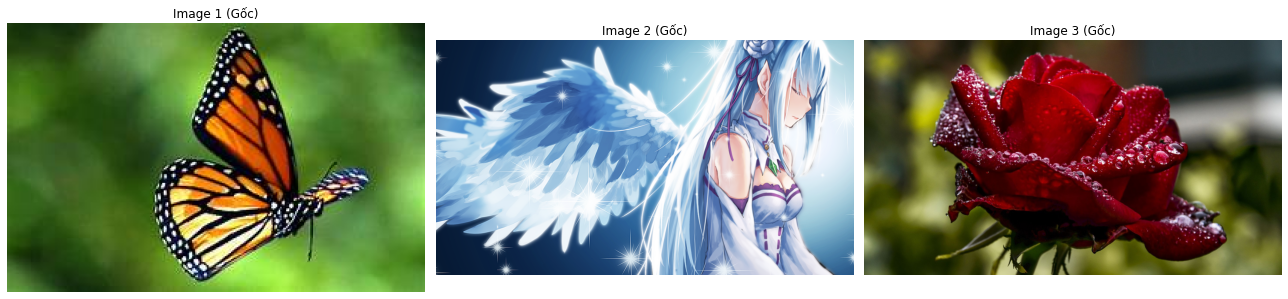


Nhấn các phím sau để thực hiện biến đổi:
I: Image inverse transformation
G: Gamma-Correction
L: Log Transformation
H: Histogram equalization
C: Contrast Stretching
A: Adaptive Histogram Equalization (CLAHE)
X: Để hiển thị lại ảnh gốc
Áp dụng Contrast Stretching với min=92, max=168
Đã lưu: output_contrast_stretch_1.jpg
Đã lưu: output_contrast_stretch_2.jpg
Đã lưu: output_contrast_stretch_3.jpg


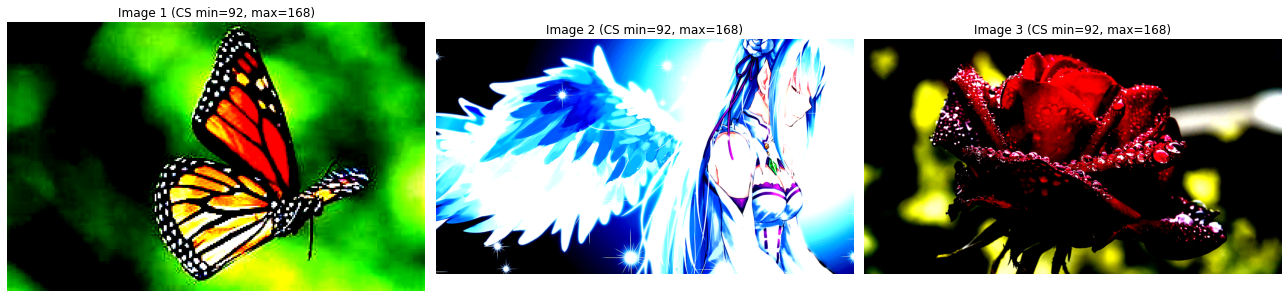

Chương trình đã kết thúc.


In [4]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

image_paths = ['image1.jpg', 'image2.jpg', 'image3.jpg']
images = []
for path in image_paths:
    img = cv2.imread(path)
    if img is None:
        print(f"Lỗi: Không tìm thấy ảnh '{path}'. Vui lòng kiểm tra lại đường dẫn.")
        exit()
    images.append(img)
print("Đã đọc thành công 3 ảnh đầu vào.")

# --- Đổi cách hiển thị từ cv2.imshow sang matplotlib.pyplot.imshow ---
def display_images_mpl(img_list, titles):
    num_images = len(img_list)
    if num_images == 0:
        return

    plt.figure(figsize=(18, 6)) # Kích thước figure lớn hơn để chứa nhiều ảnh

    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        # Chuyển từ BGR sang RGB cho Matplotlib
        if len(img_list[i].shape) == 3: # Ảnh màu
            plt.imshow(cv2.cvtColor(img_list[i], cv2.COLOR_BGR2RGB))
        else: # Ảnh grayscale
            plt.imshow(img_list[i], cmap='gray')
        
        plt.title(titles[i])
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

def save_image(img, method_name, img_index):
    filename = f"output_{method_name}_{img_index}.jpg"
    cv2.imwrite(filename, img)
    print(f"Đã lưu: {filename}")

current_images = list(images) # Bắt đầu với ảnh gốc
display_images_mpl(current_images, ["Image 1 (Gốc)", "Image 2 (Gốc)", "Image 3 (Gốc)"])
print("\nNhấn các phím sau để thực hiện biến đổi:")
print("I: Image inverse transformation")
print("G: Gamma-Correction")
print("L: Log Transformation")
print("H: Histogram equalization")
print("C: Contrast Stretching")
print("A: Adaptive Histogram Equalization (CLAHE)")
print("X: Để hiển thị lại ảnh gốc") # Thêm tùy chọn để hiển thị lại ảnh gốc sau khi biến đổi

# Vì đang dùng Matplotlib, chúng ta sẽ không có vòng lặp lắng nghe phím.
# Thay vào đó, bạn sẽ chạy từng phần code biến đổi riêng biệt hoặc sử dụng input().
# Để mô phỏng "menu động" bằng input(), bạn có thể làm như sau:

while True:
    choice = input("\nNhập phím biến đổi (I, G, L, H, C, A) hoặc 'Q' để thoát: ").lower()

    if choice == 'q':
        break

    transformed_images = []
    titles = []
    method_name = ""

    if choice == 'i':
        method_name = "inverse"
        for i, img in enumerate(images):
            inverted_img = 255 - img
            transformed_images.append(inverted_img)
            titles.append(f"Image {i+1} (Inverse)")
            save_image(inverted_img, method_name, i+1)
            
    elif choice == 'g':
        method_name = "gamma"
        gamma = random.uniform(0.5, 2.0)
        print(f"Áp dụng Gamma-Correction với gamma = {gamma:.2f}")
        for i, img in enumerate(images):
            img_float = img.astype(np.float32) / 255.0
            gamma_corrected = np.array(255 * (img_float ** gamma), dtype=np.uint8)
            transformed_images.append(gamma_corrected)
            titles.append(f"Image {i+1} (Gamma={gamma:.2f})")
            save_image(gamma_corrected, method_name, i+1)

    elif choice == 'l':
        method_name = "log"
        c = random.uniform(1.0, 5.0)
        print(f"Áp dụng Log Transformation với hệ số c = {c:.2f}")
        for i, img in enumerate(images):
            log_transformed = np.array(c * np.log(1 + img.astype(np.float32)), dtype=np.uint8)
            transformed_images.append(log_transformed)
            titles.append(f"Image {i+1} (Log c={c:.2f})")
            save_image(log_transformed, method_name, i+1)

    elif choice == 'h':
        method_name = "hist_eq"
        for i, img in enumerate(images):
            if len(img.shape) == 3:
                img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                equalized_gray = cv2.equalizeHist(img_gray)
                equalized_img = equalized_gray
            else:
                equalized_img = cv2.equalizeHist(img)

            transformed_images.append(equalized_img)
            titles.append(f"Image {i+1} (Hist EQ)")
            save_image(equalized_img, method_name, i+1)

    elif choice == 'c':
        method_name = "contrast_stretch"
        min_val = random.randint(0, 100)
        max_val = random.randint(155, 255)
        if min_val >= max_val:
            min_val, max_val = max_val - 1, min_val
        
        print(f"Áp dụng Contrast Stretching với min={min_val}, max={max_val}")
        for i, img in enumerate(images):
            stretched_img = np.interp(img.astype(np.float32), (min_val, max_val), (0, 255)).astype(np.uint8)
            transformed_images.append(stretched_img)
            titles.append(f"Image {i+1} (CS min={min_val}, max={max_val})")
            save_image(stretched_img, method_name, i+1)

    elif choice == 'a':
        method_name = "clahe"
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        for i, img in enumerate(images):
            if len(img.shape) == 3:
                lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
                l, a, b = cv2.split(lab)
                cl = clahe.apply(l)
                merged_lab = cv2.merge([cl, a, b])
                clahe_img = cv2.cvtColor(merged_lab, cv2.COLOR_LAB2BGR)
            else:
                clahe_img = clahe.apply(img)
            
            transformed_images.append(clahe_img)
            titles.append(f"Image {i+1} (CLAHE)")
            save_image(clahe_img, method_name, i+1)
    
    elif choice == 'x': # Tùy chọn để hiển thị lại ảnh gốc
        display_images_mpl(images, ["Image 1 (Gốc)", "Image 2 (Gốc)", "Image 3 (Gốc)"])
        continue # Tiếp tục vòng lặp mà không xử lý biến đổi

    if transformed_images:
        display_images_mpl(transformed_images, titles)

print("Chương trình đã kết thúc.")

# Câu 3

Đã đọc thành công 3 ảnh đầu vào cho Câu 3.

Áp dụng công thức tuyến tính cho pagoda.jpg với alpha=1.92, beta=26


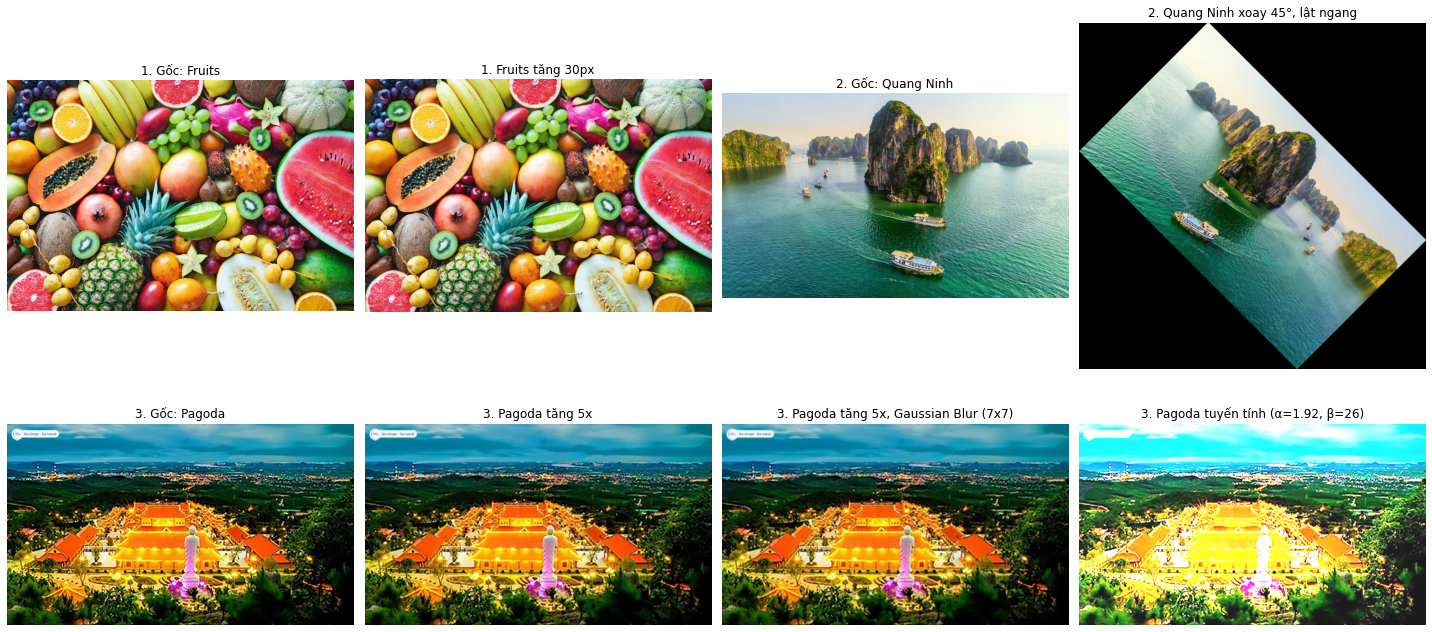

In [1]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# Đọc các ảnh đầu vào
try:
    img_fruits = cv2.imread('colorful-ripe-tropical-fruits.jpg')
    img_quangninh = cv2.imread('quang_ninh.jpg')
    img_pagoda = cv2.imread('pagoda.jpg')

    if img_fruits is None:
        raise FileNotFoundError("Không tìm thấy ảnh 'colorful-ripe-tropical-fruits.jpg'.")
    if img_quangninh is None:
        raise FileNotFoundError("Không tìm thấy ảnh 'quang_ninh.jpg'.")
    if img_pagoda is None:
        raise FileNotFoundError("Không tìm thấy ảnh 'pagoda.jpg'.")
    
    print("Đã đọc thành công 3 ảnh đầu vào cho Câu 3.")

except FileNotFoundError as e:
    print(f"Lỗi: {e} Vui lòng kiểm tra lại đường dẫn hoặc tên file.")
    exit()

def display_img_mpl(img, title, subplot_pos=None):
    if subplot_pos:
        plt.subplot(subplot_pos[0], subplot_pos[1], subplot_pos[2])
    
    if len(img.shape) == 3: # Ảnh màu
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else: # Ảnh grayscale
        plt.imshow(img, cmap='gray')
    
    plt.title(title)
    plt.axis('off')

# --- Tăng kích thước ảnh thêm 30 pixel ở cả chiều rộng và chiều cao  ---
height_fruits, width_fruits = img_fruits.shape[:2]
new_width_fruits = width_fruits + 30
new_height_fruits = height_fruits + 30
resized_fruits_img = cv2.resize(img_fruits, (new_width_fruits, new_height_fruits), interpolation=cv2.INTER_LINEAR)

# --- Xoay ảnh quang_ninh.jpg 45 độ theo chiều kim đồng hồ và lật ngang---
(h_qn, w_qn) = img_quangninh.shape[:2]
center_qn = (w_qn // 2, h_qn // 2)

# Lật ngang ảnh trước
flipped_quangninh = cv2.flip(img_quangninh, 1)

# Xoay ảnh 45 độ theo chiều kim đồng hồ
M_rotate = cv2.getRotationMatrix2D(center_qn, -45, 1.0) # -45 độ cho chiều kim đồng hồ
# Tính toán kích thước mới để đảm bảo ảnh không bị cắt
cos = np.abs(M_rotate[0, 0])
sin = np.abs(M_rotate[0, 1])
nW = int((h_qn * sin) + (w_qn * cos))
nH = int((h_qn * cos) + (w_qn * sin))

M_rotate[0, 2] += (nW / 2) - center_qn[0]
M_rotate[1, 2] += (nH / 2) - center_qn[1]

rotated_flipped_quangninh = cv2.warpAffine(flipped_quangninh, M_rotate, (nW, nH))

# --- Tăng kích thước ảnh pagoda.jpg lên 5 lần và áp dụng Gaussian blur với kernel 7x7 để làm mịn ---
(h_pg, w_pg) = img_pagoda.shape[:2]
new_width_pagoda = w_pg * 5
new_height_pagoda = h_pg * 5
enlarged_pagoda = cv2.resize(img_pagoda, (new_width_pagoda, new_height_pagoda), interpolation=cv2.INTER_LINEAR)

gaussian_blurred_pagoda = cv2.GaussianBlur(enlarged_pagoda, (7, 7), 0)


# Chọn ngẫu nhiên alpha và beta
alpha = random.uniform(0.5, 2.0)
beta = random.randint(-50, 50)

print(f"\nÁp dụng công thức tuyến tính cho pagoda.jpg với alpha={alpha:.2f}, beta={beta}")

# Chuyển đổi ảnh sang kiểu float để thực hiện phép toán
pagoda_float = img_pagoda.astype(np.float32)

# Áp dụng công thức
linear_transformed_pagoda = alpha * pagoda_float + beta

# Giới hạn giá trị pixel trong khoảng [0, 255] và chuyển về kiểu uint8
linear_transformed_pagoda = np.clip(linear_transformed_pagoda, 0, 255).astype(np.uint8)

# --- Hiển thị tất cả các ảnh kết quả ---
plt.figure(figsize=(20, 10))

display_img_mpl(img_fruits, "1. Gốc: Fruits", (2, 4, 1))
display_img_mpl(resized_fruits_img, "1. Fruits tăng 30px", (2, 4, 2))

display_img_mpl(img_quangninh, "2. Gốc: Quang Ninh", (2, 4, 3))
display_img_mpl(rotated_flipped_quangninh, "2. Quang Ninh xoay 45°, lật ngang", (2, 4, 4))

display_img_mpl(img_pagoda, "3. Gốc: Pagoda", (2, 4, 5))
display_img_mpl(enlarged_pagoda, "3. Pagoda tăng 5x", (2, 4, 6))
display_img_mpl(gaussian_blurred_pagoda, "3. Pagoda tăng 5x, Gaussian Blur (7x7)", (2, 4, 7))
display_img_mpl(linear_transformed_pagoda, f"3. Pagoda tuyến tính (α={alpha:.2f}, β={beta})", (2, 4, 8))

plt.tight_layout()
plt.show()


# Câu 4